In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df = pd.read_csv("C:\\Datasets\\AutoMobiledata.csv")
df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
864,461882,Female,No,28,Yes,Doctor,0.0,Low,5.0,Cat_7,D
2413,467256,Male,No,30,No,Healthcare,1.0,Low,4.0,Cat_2,A
2425,467309,Female,No,36,Yes,Engineer,4.0,Low,1.0,Cat_7,A
1364,463566,Female,Yes,35,Yes,Homemaker,NaN,Average,4.0,Cat_2,D
236,459727,Male,Yes,82,No,Lawyer,NaN,High,2.0,Cat_6,D


In [4]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [5]:
df.describe(include="object")

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,2627,2577,2603,2589,2627,2595,2627
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,A
freq,1424,1520,1602,802,1616,1672,846


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [7]:
## Checking for null values
empty_columns = []
for col in df.columns:
    value = df[col].isnull().sum()
    if value:
        empty_columns.append(col)
        print(f"{col}\t->\t{value}")

Ever_Married	->	50
Graduated	->	24
Profession	->	38
Work_Experience	->	269
Family_Size	->	113
Var_1	->	32


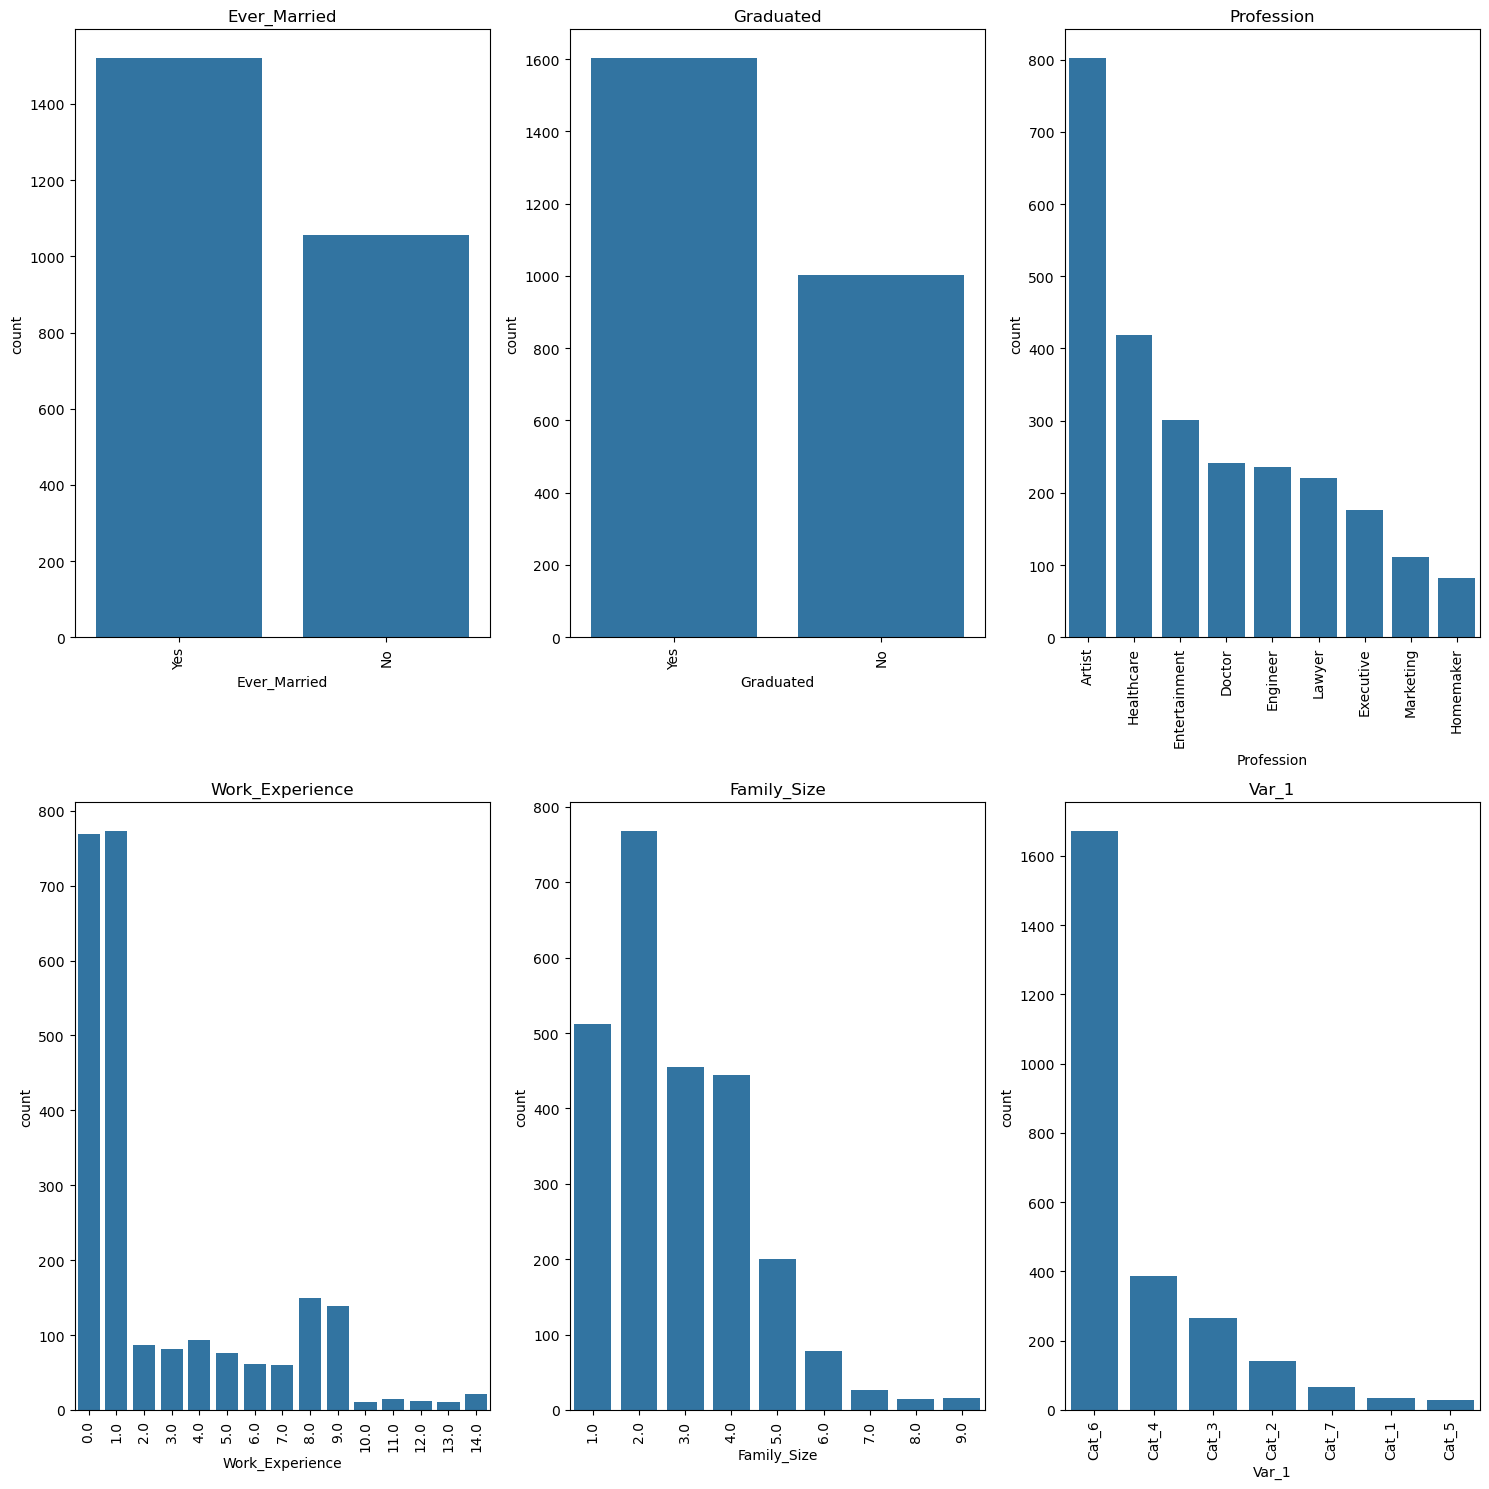

In [8]:
#Ploting no of different data value in each columns
plt.figure(figsize=(15,15))
for pos,col in enumerate(empty_columns):
    axs = plt.subplot(2,3,pos+1)
    value = df[col].value_counts()
    sns.barplot(data=value, ax=axs)
    axs.set_title(col)
    axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
plt.tight_layout()

#### Exploring High Spending People

In [16]:
## Spending Score Exploring
high_ss_df = df[df["Spending_Score"]=="High"]
high_ss_df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
86,459258,Female,Yes,83,Yes,Lawyer,1.0,High,NaN,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C
599,460962,Male,Yes,61,Yes,Executive,9.0,High,4.0,Cat_6,D
2366,467116,Male,Yes,65,Yes,Executive,1.0,High,2.0,Cat_6,B
2543,467693,Male,Yes,59,Yes,Entertainment,5.0,High,5.0,Cat_6,B


<Axes: ylabel='Segmentation'>

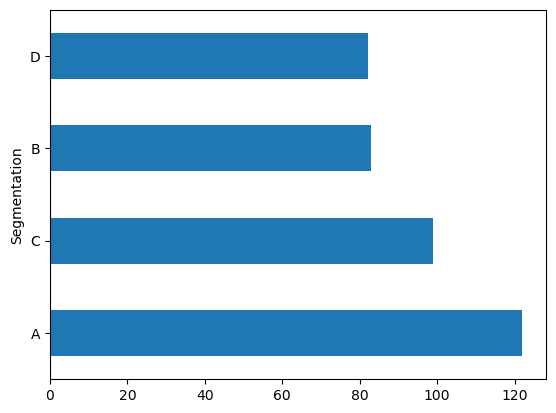

In [17]:
##Which Segment are High Spending Score people are intrested
high_ss_df["Segmentation"].value_counts().plot(kind="barh")

In [18]:
# Average of Age, WorkExperience,FamilySize with respect to gender 
high_ss_df.groupby("Gender")[["Age","Work_Experience","Family_Size"]].mean()

,Age,Work_Experience,Family_Size
Gender,,,
Female,62.685535,2.206107,2.666667
Male,57.251101,2.090452,3.117117


<Axes: xlabel='count', ylabel='Var_1'>

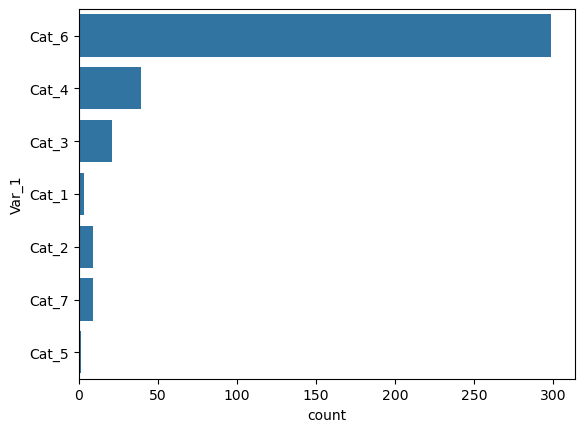

In [19]:
##Var_1 
sns.countplot(high_ss_df["Var_1"])

- Categorical 6 and high spending Score has high correlation

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Executive'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Artist'),
  Text(5, 0, 'Homemaker'),
  Text(6, 0, 'Marketing'),
  Text(7, 0, 'Entertainment'),
  Text(8, 0, 'Engineer')])

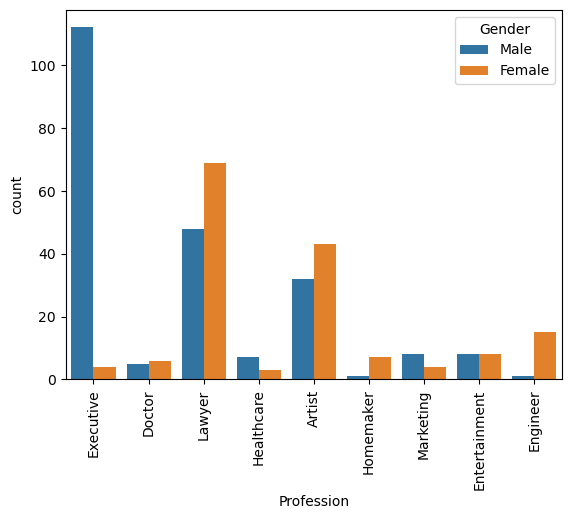

In [26]:
## Which Profession people has high spending score
sns.countplot(data=high_ss_df,x="Profession",hue="Gender")
plt.xticks(rotation=90)

- More Male like Executive as a profession

In [29]:
## exploring profession -> Homemaker
for col in empty_columns:
    if df[col].dtype != "O":
        avg = df[col].mean()
        df[col] = df[col].fillna(avg)

df.isnull().sum()

ID                  0
Gender              0
Ever_Married       50
Age                 0
Graduated          24
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
Segmentation        0
dtype: int64

In [31]:
df = df.dropna(axis=0)
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [33]:
## output distribution
df["Segmentation"].value_counts()

Segmentation
A    794
D    726
B    523
C    445
Name: count, dtype: int64

In [35]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

#### Exploring Profession

In [38]:
profession_df = df.groupby("Profession")[["Age","Work_Experience","Family_Size"]]

In [40]:
profession_df.mean()

,Age,Work_Experience,Family_Size
Profession,,,
Artist,46.122581,2.613817,2.460010
Doctor,38.425532,2.470657,2.920972
Engineer,40.682819,2.617431,2.939444
Entertainment,42.702055,2.730710,2.723308
Executive,50.822485,2.339609,3.501643
Healthcare,26.544081,2.450280,3.634280
Homemaker,38.092105,5.484755,2.365495
Lawyer,75.480952,1.431823,2.028344
Marketing,38.252336,2.439986,3.216139


In [42]:
categorica_columns = df.select_dtypes(include="object").columns
numerical_columns = df.select_dtypes(exclude="object").columns
numerical_columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')

In [44]:
categorica_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']
numerical_columns = ['Age', 'Work_Experience', 'Family_Size']

## Important Libraries

In [87]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC

In [114]:
# Splitting Test Train dataset
X = df.drop(columns=["Segmentation","ID"])
y=df["Segmentation"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=55, stratify=y)
X_train.shape, X_test.shape

((1990, 9), (498, 9))

In [116]:
X_train.sample(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
1021,Male,Yes,50,Yes,Artist,0.000000,Average,4.0,Cat_6
1155,Male,No,22,No,Healthcare,1.000000,Low,3.0,Cat_6
2287,Female,No,21,No,Healthcare,2.000000,Low,3.0,Cat_6
115,Female,Yes,74,No,Homemaker,2.552587,Low,1.0,Cat_6
459,Male,Yes,26,No,Entertainment,2.000000,Low,4.0,Cat_3


In [118]:
categorica_columns =['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Var_1']

# 'Spending_Score',

In [120]:
df["Spending_Score"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [122]:
# Creating Clustring Pipeline
#name,transformer,columns

## For X
colTrans = ColumnTransformer([("ohe",OneHotEncoder(drop="first"),categorica_columns),
                  ("labelEncoder",OrdinalEncoder(categories=[['Low', 'Average', 'High']]),["Spending_Score"]),
                  ("minmax",MinMaxScaler(),numerical_columns)], remainder="passthrough")
## For y
labelEncod = LabelEncoder()

In [124]:
X_train = colTrans.fit_transform(X_train)
y_train = labelEncod.fit_transform(y_train)

In [126]:
X_test = colTrans.transform(X_test)
y_test = labelEncod.transform(y_test)

## Cheking for correlation

<Axes: >

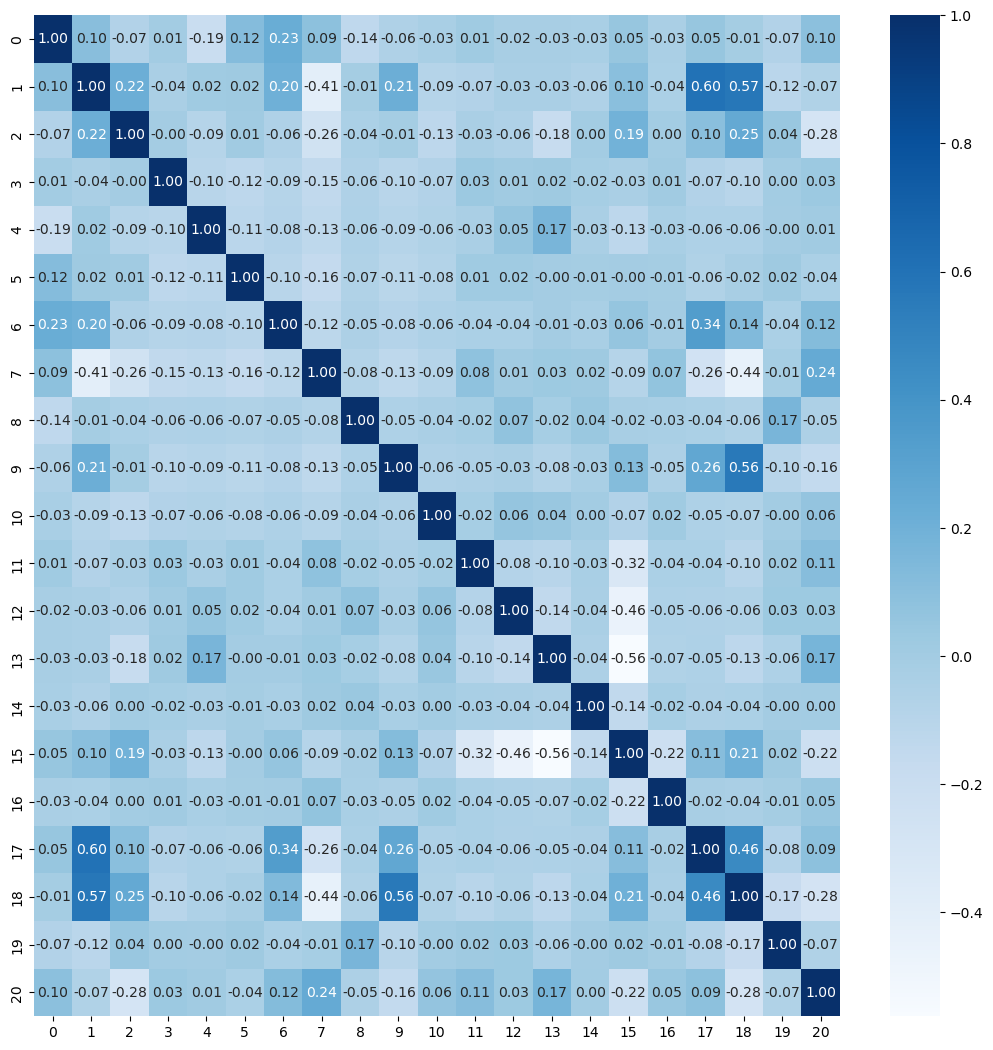

In [129]:
corr = np.corrcoef(X_train.T)
plt.figure(figsize=(13,13))
sns.heatmap(corr, fmt='.2f',cmap=plt.cm.Blues, annot=True)

In [130]:
import mlflow

## Creating A Complete End to End Pipeline and ML-Flow intrigation

In [134]:
# Defining Parameters on which model need to be train
## logistic regression did not make
param_grids = {
    "Random_Forest":{"n_estimators" : [50, 100, 150,200],
                    "max_depth": [None, 5,10, 20]},
    "AdaBoost":{"n_estimators" : [50, 100, 150, 200],
                "learning_rate": [0.01, 0.1, 0.25, 0.75, 1.0]},
    'SVM': {'C': [0.1, 1, 10],
            'kernel': ['linear','rbf']},
}

In [136]:
## Defining classifier Model
classifiers = {
    "Random_Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    'SVM': SVC(random_state=42),
}

In [138]:
labelEncod.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [150]:
# Creating a function which will make my life easy to find classifiction report of train and test data
# confusion metrix value and classifiction report daiga for both train and test data
def evaluat_model(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    report_train = classification_report(y_train,y_train_pred.reshape(-1,1))
    report_test = classification_report(y_test,y_test_pred.reshape(-1,1))

    cm = confusion_matrix(y_test, y_test_pred.reshape(-1,1)) 
    # Display confusion matrix 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelEncod.classes_) 
    disp.plot(cmap=plt.cm.Blues) 
    plt.show()
    
    return report_train, report_test


#### Creating ML-Flow main loop

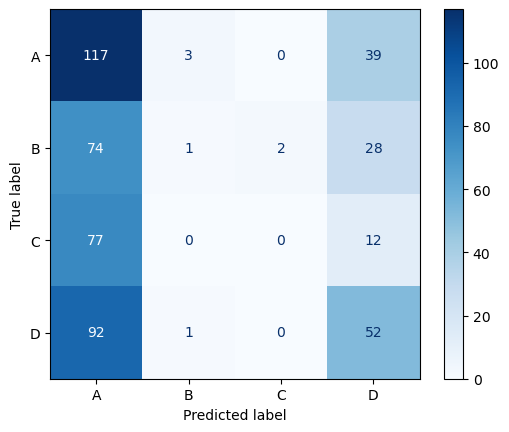

2024/12/11 20:25:55 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Found array with 0 sample(s) (shape=(0, 21)) while a minimum of 1 is required by RandomForestClassifier.'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.


Random_Forest, Train acc: 0.42462311557788945, Test acc: 0.3413654618473896
best parameters: {'max_depth': 5, 'n_estimators': 200}



2024/12/11 20:26:01 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": []
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


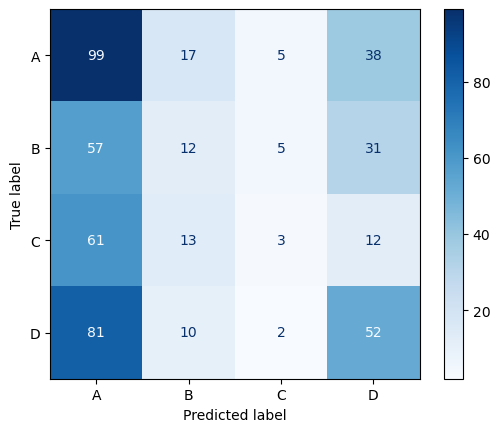

2024/12/11 20:26:12 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Found array with 0 sample(s) (shape=(0, 21)) while a minimum of 1 is required by AdaBoostClassifier.'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.


AdaBoost, Train acc: 0.38341708542713565, Test acc: 0.3333333333333333
best parameters: {'learning_rate': 0.1, 'n_estimators': 100}



2024/12/11 20:26:20 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": []
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


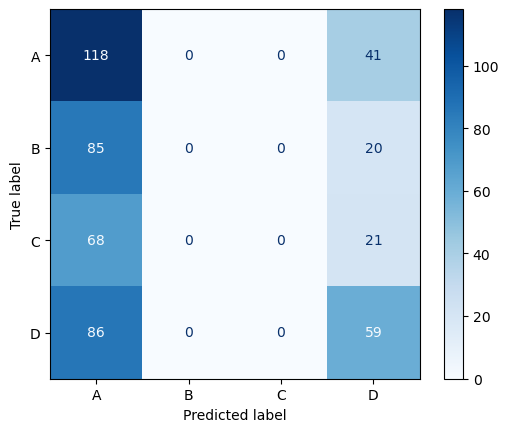

2024/12/11 20:26:23 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('Found array with 0 sample(s) (shape=(0, 21)) while a minimum of 1 is required by SVC.'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.


SVM, Train acc: 0.35477386934673366, Test acc: 0.35542168674698793
best parameters: {'C': 1, 'kernel': 'linear'}



2024/12/11 20:26:29 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": []
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [152]:
#Start ML flow run
for name,clf in classifiers.items():
    with mlflow.start_run(run_name=name):
        #Creating Grid Search CV
        param_grid = param_grids[name]
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                                  cv=3, n_jobs=-1)
        
        #model fitting
        grid_search.fit(X_train,y_train)
        best_model = grid_search.best_estimator_
        
        #Evaluate the model using evaluate_model function
        report_train, report_test = evaluat_model(best_model)
        
        # Logging the data inside the Mlflow
        mlflow.log_param("Classifier",name)
        mlflow.log_params(grid_search.best_params_)
        
        train_acc = best_model.score(X_train,y_train)
        mlflow.log_metric("train_accuracy",train_acc)
        
        test_acc = best_model.score(X_test,y_test)
        mlflow.log_metric("test_accuracy",test_acc)
        
        print(f"{name}, Train acc: {train_acc}, Test acc: {test_acc}")
        print(f"best parameters: {grid_search.best_params_}")
        print("="*30)
        print()
        
        mlflow.log_text(report_train,f"{name}_train_classification_report.txt")
        mlflow.log_text(report_test,f"{name}_test_classification_report.txt")

        input_example = X_train[:0]
        
        # to load model
        mlflow.sklearn.log_model(best_model,name, input_example=input_example)
    mlflow.end_run()

## Creating ANN Model

In [148]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback

In [160]:
from tensorflow.keras.layers import LeakyReLU

In [162]:
## Creating An ANN model
model = Sequential([
    (Dense(units=100, activation=LeakyReLU(alpha=0.01), input_shape=(X_train.shape[1],))),
    (Dense(units=50, activation=LeakyReLU(alpha=0.01))),
    (Dense(units=20, activation=LeakyReLU(alpha=0.01))),
    (Dense(units=4, activation="softmax"))
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,354 (32.63 KB)

 Trainable params: 8,354 (32.63 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

# model compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [176]:
with mlflow.start_run(run_name="ANN Model 3"): 
    history = model.fit(X_train, y_train, epochs=50,
                        validation_data=(X_test, y_test), verbose=2)
    # Log the model 
    mlflow.keras.log_model(model, "model")
    
    # Log parameters 
    mlflow.log_param("epochs", 50) 
    mlflow.log_param("optimizer", "adam") 
    
    # Log metrics 
    train_accuracy = history.history['accuracy'][-1] 
    val_accuracy = history.history['val_accuracy'][-1]
    mlflow.log_metric("train_accuracy", train_accuracy) 
    mlflow.log_metric("val_accuracy", val_accuracy) 
    
    print(f"Train accuracy: {train_accuracy}") 
    print(f"Validation accuracy: {val_accuracy}")

Epoch 1/50
63/63 - 0s - 7ms/step - accuracy: 0.3608 - loss: 1.3195 - val_accuracy: 0.3594 - val_loss: 1.3410
Epoch 2/50
63/63 - 0s - 6ms/step - accuracy: 0.3618 - loss: 1.3097 - val_accuracy: 0.3494 - val_loss: 1.3424
Epoch 3/50
63/63 - 1s - 9ms/step - accuracy: 0.3734 - loss: 1.3029 - val_accuracy: 0.3554 - val_loss: 1.3452
Epoch 4/50
63/63 - 0s - 6ms/step - accuracy: 0.3719 - loss: 1.2978 - val_accuracy: 0.3454 - val_loss: 1.3479
Epoch 5/50
63/63 - 0s - 6ms/step - accuracy: 0.3804 - loss: 1.2913 - val_accuracy: 0.3373 - val_loss: 1.3544
Epoch 6/50
63/63 - 0s - 7ms/step - accuracy: 0.3899 - loss: 1.2850 - val_accuracy: 0.3273 - val_loss: 1.3710
Epoch 7/50
63/63 - 0s - 6ms/step - accuracy: 0.3940 - loss: 1.2796 - val_accuracy: 0.3273 - val_loss: 1.3674
Epoch 8/50
63/63 - 0s - 5ms/step - accuracy: 0.4090 - loss: 1.2688 - val_accuracy: 0.3373 - val_loss: 1.3670
Epoch 9/50
63/63 - 0s - 7ms/step - accuracy: 0.4116 - loss: 1.2634 - val_accuracy: 0.3293 - val_loss: 1.3731
Epoch 10/50
63/63 -

2024/12/11 20:47:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/11 20:47:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\rawat\AppData\Local\Temp\tmpo0y6hdjs\model, flavor: keras). Fall back to return ['keras==3.7.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/11 20:47:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Train accuracy: 0.566331684589386
Validation accuracy: 0.2670682668685913


In [178]:
## over fitted model